# Introduction to Keras

* high-level neural networks API, written in Python, part of [TensorFlow 2.x](https://www.tensorflow.org/)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for example [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](https://github.com/jirimaterna/image-processing-2days/blob/master/images/mnist-examples.png?raw=1)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
import pickle
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

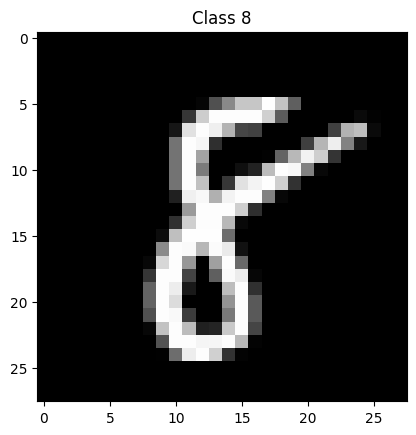

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [5]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [6]:
from keras.utils import to_categorical

n_classes = 10

print(y_train[49])

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture definition

Create a sequential model

In [7]:
from tensorflow.keras.models import Sequential

model = Sequential()

Define its structure.

In [29]:
from tensorflow.keras.layers import Dense, Activation, Input

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('tanh'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [31]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 10, verbose=1,
          validation_data=(X_test_flat, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5982 - loss: 1.5195 - val_accuracy: 0.9627 - val_loss: 0.2710
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9699 - loss: 0.2215 - val_accuracy: 0.9600 - val_loss: 0.2519
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.1441 - val_accuracy: 0.9617 - val_loss: 0.2414
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9797 - loss: 0.1346 - val_accuracy: 0.9666 - val_loss: 0.1990
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0839 - val_accuracy: 0.9715 - val_loss: 0.1749
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0512 - val_accuracy: 0.9726 - val_loss: 0.1634
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9943 - loss: 0.0354 - val_accuracy: 0.9714 - val_loss: 0.1707
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9941 - loss: 0.0349 - val_accuracy: 0.

## Evaluate the model

First we need to convert probability vectors to class indices.

In [32]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


In [33]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9705

              precision    recall  f1-score   support

           0     0.9769    0.9929    0.9848       980
           1     0.9903    0.9850    0.9876      1135
           2     0.9330    0.9719    0.9521      1032
           3     0.9827    0.9554    0.9689      1010
           4     0.9766    0.9756    0.9761       982
           5     0.9802    0.9439    0.9617       892
           6     0.9821    0.9718    0.9769       958
           7     0.9747    0.9728    0.9737      1028
           8     0.9312    0.9733    0.9518       974
           9     0.9807    0.9584    0.9694      1009

    accuracy                         0.9705     10000
   macro avg     0.9708    0.9701    0.9703     10000
weighted avg     0.9709    0.9705    0.9706     10000



In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 973    0    2    1    0    0    0    1    3    0]
 [   0 1118    6    0    0    1    4    1    5    0]
 [   2    1 1003    1    2    0    3    6   14    0]
 [   2    0   11  965    0    8    0    6   12    6]
 [   1    0   12    0  958    0    1    3    1    6]
 [   5    1    6    9    0  842    8    2   16    3]
 [   6    2    5    0    6    3  931    0    5    0]
 [   0    3   16    1    0    0    0 1000    5    3]
 [   5    1    9    1    2    2    1    4  948    1]
 [   2    3    5    4   13    3    0    3    9  967]]
